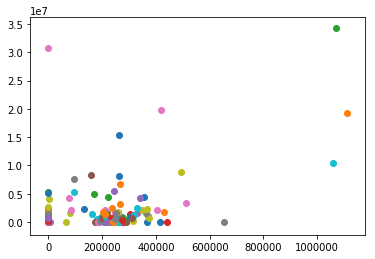

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit




def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
# feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )







### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

# imporing kmeans cluster from sklearn.cluster
from sklearn.cluster import KMeans

# creating class for KMeans cluster
Kmeans = KMeans(n_clusters=2)

# fiting the data
Kmeans.fit(finance_features)

# predicting the output
pred = Kmeans.predict(finance_features)

print(Kmeans.score(poi))


# for finding the maximum and minimum value of exercised_stock_options
max=0
min=100000
for i in data_dict:
    if data_dict[i]["exercised_stock_options"] == 'NaN':
        continue
    if data_dict[i]["exercised_stock_options"]>max:
        max = data_dict[i]["exercised_stock_options"]
    if data_dict[i]["exercised_stock_options"]<min:
        min = data_dict[i]["exercised_stock_options"]
print("Max:",max)
print("Min:",min)

# for finding the maximum and minimum salary
max=0
min=100000
for i in data_dict:
    if data_dict[i]["salary"] == 'NaN':
        continue
    if data_dict[i]["salary"]>max:
        max = data_dict[i]["salary"]
    if data_dict[i]["salary"]<min:
        min = data_dict[i]["salary"]
print("Max Salary:",max)
print("Min Salary:",min)
    
    


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")
    
    
    
# on applying feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(finance_features)

print(scaler.transform([[200000, 1000000]]))
